In [20]:
import numpy as np
import matplotlib.pyplot as plt

import services.data_service as svc
from data import mongo_setup

In [8]:
# setting the global parameters for mongoDB
mongo_setup.global_init()

In [17]:
# setting global values
sort_names = ['selection_sort', 'bubble_sort', 'insertion_sort', 'cocktail_sort', 'radix_sort', 'merge_sort', 'quick_sort_iterative', 'gnome_sort', 'shell_sort', 'tree_sort', 'tim_sort']

formatted_data = []

In [28]:
# fetching and storing the required data from db
for sort_name in sort_names:
    print(f'\n {sort_name} : ')

    data_sort = svc.fetch_sorttime_using_name('selection_sort')
    sorts = data_sort.sorts

    for sort_data in sorts:
        array_data = sort_data.array
        entry = {}
        entry['name'] = sort_name
        entry['time'] = sort_data.time_to_sort
        entry['access_count'] = sort_data.array_access_count
        entry['type'] = array_data.array_type
        
        formatted_data.append(entry)
        print(f'\t Time: {sort_data.time_to_sort} \t  Array access Count: {sort_data.array_access_count} \t Array type: {array_data.array_type}')


 selection_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	 Array type: linear

 bubble_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	 Array type: linear

 insertion_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	 Array type: linear

 cocktail_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	 Array type: linear

 radix_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	 Array type: linear

 merge_sort : 
	 Time: 59296875000.0 	  Array access Count: 509980226 	 Array type: random
	 Time: 63671875000.0 	  Array access Count: 504495000 	

In [33]:
# filter the random array type times to sort
random_array_times = [(sort_data['name'], sort_data['time']) for sort_data in formatted_data if sort_data['type'] == 'random']

X_sort_names = [entry[0] for entry in random_array_times]
Y_times = [entry[1] for entry in random_array_times]

print(X_sort_names, Y_times)

['selection_sort', 'bubble_sort', 'insertion_sort', 'cocktail_sort', 'radix_sort', 'merge_sort', 'quick_sort_iterative', 'gnome_sort', 'shell_sort', 'tree_sort', 'tim_sort'] [59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0, 59296875000.0]


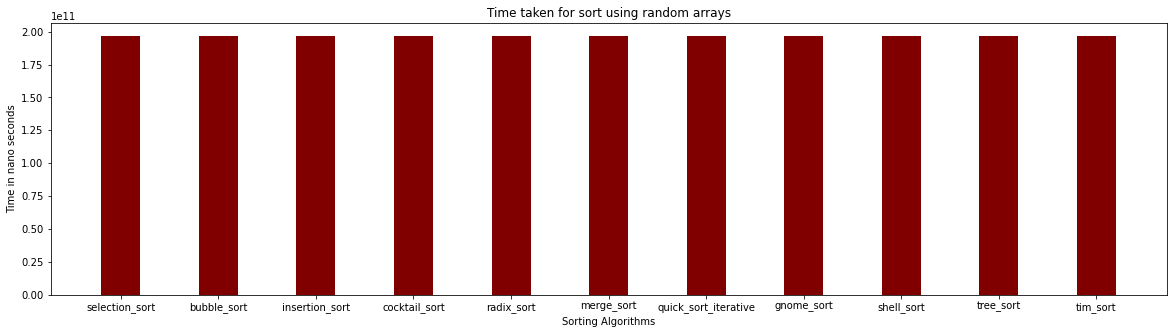

In [36]:
fig = plt.figure(figsize = (20, 5)) 
  
# creating the bar plot 
plt.bar(X_sort_names, np.linalg.norm(Y_times), color ='maroon', width = 0.4) 
  
plt.xlabel("Sorting Algorithms") 
plt.ylabel("Normalised time taken") 
plt.title("Time taken for sort using random arrays") 
plt.show() 